# **Ticket to Tech**
**Authors:** Makenzie Kadjeski, Carrie Houston, Jeny Thomas<br>
**Date:** November 24, 2025 <br>
**Purpose:** This project compares the amount of time it takes for several different path planning algorithms- Breadth-First Search, Depth-First Search, A* Search, and Bidirectional Search- to find the shortest path between two given vertices. This program receives user input as the start and end point, prints the path taken, and the time it took to compute that path. Our data is based off of the buildings at Tennessee Tech and their relative locations to each other.

# BFS Explanation
Breadth First Search (BFS) is a graph traversal algorithm that starts from a source node and explores the graph level by level. First, it visits all nodes directly adjacent to the source. Then, it moves on to visit the adjacent nodes of those nodes, and this process continues until all reachable nodes are visited.


In [1]:
#BFS
def BFS(start, goal):
    q = deque([start])
    parent = [-1] * len(graph)
    visited = [False] * len(graph)
    visited[start] = True

    while q:
        node = q.popleft()
        if node == goal:
            break

        for neighbor in range(len(graph[node])):
            if graph[node][neighbor] != 0 and not visited[neighbor]:
                visited[neighbor] = True
                parent[neighbor] = node
                q.append(neighbor)

    if not visited[goal]:
        return []

    path = []
    cur = goal
    while cur != -1:
        path.append(cur)
        cur = parent[cur]
    return list(reversed(path))


# DFS Explanation: 
Depth First Search (DFS) is a graph traversal method that starts from a source vertex and explores each path completely before backtracking and exploring other paths. To avoid revisiting nodes in graphs with cycles, a visited array is used to track visited vertices.

In [2]:
#DFS
def DFS(start, goal):
    stack = [start]
    parent = [-1] * len(graph)
    visited = [False] * len(graph)
    visited[start] = True

    while stack:
        node = stack.pop()
        if node == goal:
            break

        for neighbor in reversed(range(len(graph[node]))):
            if graph[node][neighbor] != 0 and not visited[neighbor]:
                visited[neighbor] = True
                parent[neighbor] = node
                stack.append(neighbor)

    if not visited[goal]:
        return []

    path = []
    cur = goal
    while cur != -1:
        path.append(cur)
        cur = parent[cur]
    return list(reversed(path))

# A* Explanation:
The A* algorithm is an informed search algorithm, meaning it leverages a heuristic function to guide its search towards the goal. This heuristic function estimates the cost of reaching the goal from a given node, allowing the algorithm to prioritize promising paths and avoid exploring unnecessary ones.

In [3]:
def heuristic(a, b):
    return abs(a - b)


def AStar(start, goal):
    pq = []
    heapq.heappush(pq, (heuristic(start, goal), 0.0, start))

    parent = {start: -1}
    gScore = {start: 0.0}

    while pq:
        f, g, node = heapq.heappop(pq)
        if node == goal:
            break

        for neighbor in range(len(graph[node])):
            if graph[node][neighbor] != 0:
                new_g = g + 1
                if neighbor not in gScore or new_g < gScore[neighbor]:
                    gScore[neighbor] = new_g
                    new_f = new_g + heuristic(neighbor, goal)
                    heapq.heappush(pq, (new_f, new_g, neighbor))
                    parent[neighbor] = node

    if goal not in parent:
        return []

    path = []
    cur = goal
    while cur != -1:
        path.append(cur)
        cur = parent[cur]
    return list(reversed(path))

# Bidirectional Explanation:
Bidirectional search replaces single search graph(which is likely to grow exponentially) with two smaller sub graphs – one starting from initial vertex and other starting from goal vertex. The search terminates when two graphs intersect.

In [4]:
#Bidirectional
def Bidirectional(start, goal):
    fParent = {start: -1}
    bParent = {goal: -1}

    fQ = deque([start])
    bQ = deque([goal])

    while fQ and bQ:
        f = fQ.popleft()
        if f in bParent:
            path1 = []
            cur = f
            while cur != -1:
                path1.append(cur)
                cur = fParent[cur]
            path1.reverse()

            path2 = []
            cur = bParent[f]
            while cur != -1:
                path2.append(cur)
                cur = bParent[cur]

            return path1 + path2

        for neighbor in range(len(graph[f])):
            if graph[f][neighbor] != 0 and neighbor not in fParent:
                fParent[neighbor] = f
                fQ.append(neighbor)

        b = bQ.popleft()
        if b in fParent:
            path1 = []
            cur = fParent[b]
            while cur != -1:
                path1.append(cur)
                cur = fParent[cur]
            path1.reverse()

            path2 = []
            cur = b
            while cur != -1:
                path2.append(cur)
                cur = bParent[cur]

            return path1 + path2

        for neighbor in range(len(graph[b])):
            if graph[b][neighbor] != 0 and neighbor not in bParent:
                bParent[neighbor] = b
                bQ.append(neighbor)

    return []


# Whole Function

We used 3 different sized graphs to compare the algorithm's efficiency with different input sizes.

In [5]:
import time
from collections import deque
import heapq


# ==========================================================
# ===============  GRAPH DEFINITIONS  ======================
# ==========================================================

# ===== SMALL GRAPH =====
SMALL_GRAPH = [
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
]

# ===== MEDIUM GRAPH =====
MEDIUM_GRAPH = [

    [0,	1,	1,	0,	1,	1,	1,	0],
    [1,	0,	1,	1,	1,	1,	0,	0],
    [1,	1,	0,	1,	1,	1,	0,	0],
    [0,	1,	1,	0,	0,	0,	0,	0],
    [1,	1,	1,	0,	0,	1,	0,	0],
    [1,	1,	1,	0,	1,	0,	1,	0],
    [1,	0,	0,	0,	0,	1,	0,	1],
    [0,	0,	0,	0,	0,	0,	1,	0]
]

# ===== LARGE GRAPH =====
LARGE_GRAPH = [

    [0,	1,	1,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [1,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0],
    [1,	1,	0,	1,	1,	1,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0],
    [0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	1,	0,	0],
    [1,	1,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0],
    [1,	1,	1,	0,	1,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0],
    [1,	0,	0,	0,	0,	1,	0,	1,	1,	1,	0,	1,	0,	1,	1,	1],
    [0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	1,	1,	1,	1,	1],
    [0,	1,	0,	0,	0,	1,	1,	1,	0,	1,	0,	1,	0,	1,	0,	0],
    [0,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	0,	1,	0,	0],
    [0,	0,	1,	1,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0],
    [0,	0,	0,	1,	0,	0,	1,	1,	1,	1,	1,	0,	1,	1,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	0,	1],
    [0,	0,	1,	1,	0,	0,	1,	1,	1,	1,	0,	1,	1,	0,	0,	0],
    [1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1],
    [1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	1,	0]
]

Choose which graph to use!

In [6]:
# ===== SELECT WHICH GRAPH TO USE =====
# graph = SMALL_GRAPH
# graph = MEDIUM_GRAPH
graph = LARGE_GRAPH   # <---- currently using large graph


In [7]:
# ==========================================================
# ===============  SEARCH ALGORITHMS  ======================
# ==========================================================
#BFS
def BFS(start, goal):
    q = deque([start])
    parent = [-1] * len(graph)
    visited = [False] * len(graph)
    visited[start] = True

    while q:
        node = q.popleft()
        if node == goal:
            break

        for neighbor in range(len(graph[node])):
            if graph[node][neighbor] != 0 and not visited[neighbor]:
                visited[neighbor] = True
                parent[neighbor] = node
                q.append(neighbor)

    if not visited[goal]:
        return []

    path = []
    cur = goal
    while cur != -1:
        path.append(cur)
        cur = parent[cur]
    return list(reversed(path))

#DFS
def DFS(start, goal):
    stack = [start]
    parent = [-1] * len(graph)
    visited = [False] * len(graph)
    visited[start] = True

    while stack:
        node = stack.pop()
        if node == goal:
            break

        for neighbor in reversed(range(len(graph[node]))):
            if graph[node][neighbor] != 0 and not visited[neighbor]:
                visited[neighbor] = True
                parent[neighbor] = node
                stack.append(neighbor)

    if not visited[goal]:
        return []

    path = []
    cur = goal
    while cur != -1:
        path.append(cur)
        cur = parent[cur]
    return list(reversed(path))


def heuristic(a, b):
    return abs(a - b)


def AStar(start, goal):
    pq = []
    heapq.heappush(pq, (heuristic(start, goal), 0.0, start))

    parent = {start: -1}
    gScore = {start: 0.0}

    while pq:
        f, g, node = heapq.heappop(pq)
        if node == goal:
            break

        for neighbor in range(len(graph[node])):
            if graph[node][neighbor] != 0:
                new_g = g + 1
                if neighbor not in gScore or new_g < gScore[neighbor]:
                    gScore[neighbor] = new_g
                    new_f = new_g + heuristic(neighbor, goal)
                    heapq.heappush(pq, (new_f, new_g, neighbor))
                    parent[neighbor] = node

    if goal not in parent:
        return []

    path = []
    cur = goal
    while cur != -1:
        path.append(cur)
        cur = parent[cur]
    return list(reversed(path))

#Bidirectional
def Bidirectional(start, goal):
    fParent = {start: -1}
    bParent = {goal: -1}

    fQ = deque([start])
    bQ = deque([goal])

    while fQ and bQ:
        f = fQ.popleft()
        if f in bParent:
            path1 = []
            cur = f
            while cur != -1:
                path1.append(cur)
                cur = fParent[cur]
            path1.reverse()

            path2 = []
            cur = bParent[f]
            while cur != -1:
                path2.append(cur)
                cur = bParent[cur]

            return path1 + path2

        for neighbor in range(len(graph[f])):
            if graph[f][neighbor] != 0 and neighbor not in fParent:
                fParent[neighbor] = f
                fQ.append(neighbor)

        b = bQ.popleft()
        if b in fParent:
            path1 = []
            cur = fParent[b]
            while cur != -1:
                path1.append(cur)
                cur = fParent[cur]
            path1.reverse()

            path2 = []
            cur = b
            while cur != -1:
                path2.append(cur)
                cur = bParent[cur]

            return path1 + path2

        for neighbor in range(len(graph[b])):
            if graph[b][neighbor] != 0 and neighbor not in bParent:
                bParent[neighbor] = b
                bQ.append(neighbor)

    return []


# ==========================================================
# ===================== PRINTING ===========================
# ==========================================================

def printPath(path, name):
    print(f"{name} Path ({max(0, len(path)-1)} steps): ", end="")
    for p in path:
        print(p + 1, end=" ")
    print()


# ==========================================================
# ======================= MAIN LOOP ========================
# ==========================================================

def main():
    while True:
        if graph == SMALL_GRAPH:
            print("\nHere is the list of locations in order.")
            print("\t1. Ashraf Islam Engineering Building" )
            print("\t2. Bruner Hall" )
            print("\t3. Library" )
            print("\t4. RUC" )
        elif graph == MEDIUM_GRAPH:
            print("\nHere is the list of locations in order.")
            print("\t1. Ashraf Islam Engineering Building" )
            print("\t2. Bruner Hall" )
            print("\t3. Library" )
            print("\t4. RUC" )
            print("\t5. Parking Lot" )
            print("\t6. Prescott Hall" )
            print("\t7. LSC" )
            print("\t8. Stonecipher" )
        else:
            print("\nHere is the list of locations in order.")
            print("\t1. Ashraf Islam Engineering Building" )
            print("\t2. Bruner Hall" )
            print("\t3. Library" )
            print("\t4. RUC" )
            print("\t5. Parking Lot" )
            print("\t6. Prescott Hall" )
            print("\t7. LSC" )
            print("\t8. Stonecipher" )
            print("\t9. Brown Hall" )
            print("\t10. Clement Hall" )
            print("\t11. BFA" )
            print("\t12. Mem Gym" )
            print("\t13. Bell Hall" )
            print("\t14. Derryberry" )
            print("\t15. Fit" )
            print("\t16. Ray Morris" )

        max = len(graph)

        print(f"\n\nWhere would you like to start? Enter 1–{max}: ", end="")
        start = int(input()) - 1

        print(f"Where would you like to end? Enter 1–{max}: ", end="")
        goal = int(input()) - 1

        # BFS
        t0 = time.perf_counter()
        bfs_path = BFS(start, goal)
        t1 = time.perf_counter()
        printPath(bfs_path, "BFS")
        print(f"BFS Time: {int((t1 - t0)*1_000_000)} microseconds\n")

        # DFS
        t0 = time.perf_counter()
        dfs_path = DFS(start, goal)
        t1 = time.perf_counter()
        printPath(dfs_path, "DFS")
        print(f"DFS Time: {int((t1 - t0)*1_000_000)} microseconds\n")

        # A*
        t0 = time.perf_counter()
        a_path = AStar(start, goal)
        t1 = time.perf_counter()
        printPath(a_path, "A*")
        print(f"A* Time: {int((t1 - t0)*1_000_000)} microseconds\n")

        # Bidirectional
        t0 = time.perf_counter()
        bi_path = Bidirectional(start, goal)
        t1 = time.perf_counter()
        printPath(bi_path, "Bidirectional")
        print(f"Bidirectional Time: {int((t1 - t0)*1_000_000)} microseconds\n")

        again = input("Run again? (y/n): ").lower()
        if again == "n":
            break


if __name__ == "__main__":
    main()




Here is the list of locations in order.
	1. Ashraf Islam Engineering Building
	2. Bruner Hall
	3. Library
	4. RUC
	5. Parking Lot
	6. Prescott Hall
	7. LSC
	8. Stonecipher
	9. Brown Hall
	10. Clement Hall
	11. BFA
	12. Mem Gym
	13. Bell Hall
	14. Derryberry
	15. Fit
	16. Ray Morris


Where would you like to start? Enter 1–16: 

 1


Where would you like to end? Enter 1–16: 

 16


BFS Path (1 steps): 1 16 
BFS Time: 35 microseconds

DFS Path (1 steps): 1 16 
DFS Time: 31 microseconds

A* Path (1 steps): 1 16 
A* Time: 23 microseconds

Bidirectional Path (1 steps): 1 16 
Bidirectional Time: 12 microseconds



Run again? (y/n):  n


# First Iteration
Small Graph (4x4)
Ashraf-Islam Engineering Building, Bruner Hall, Library, Roaden University Center

In [8]:
SMALL_GRAPH = [
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
]

Sample Output

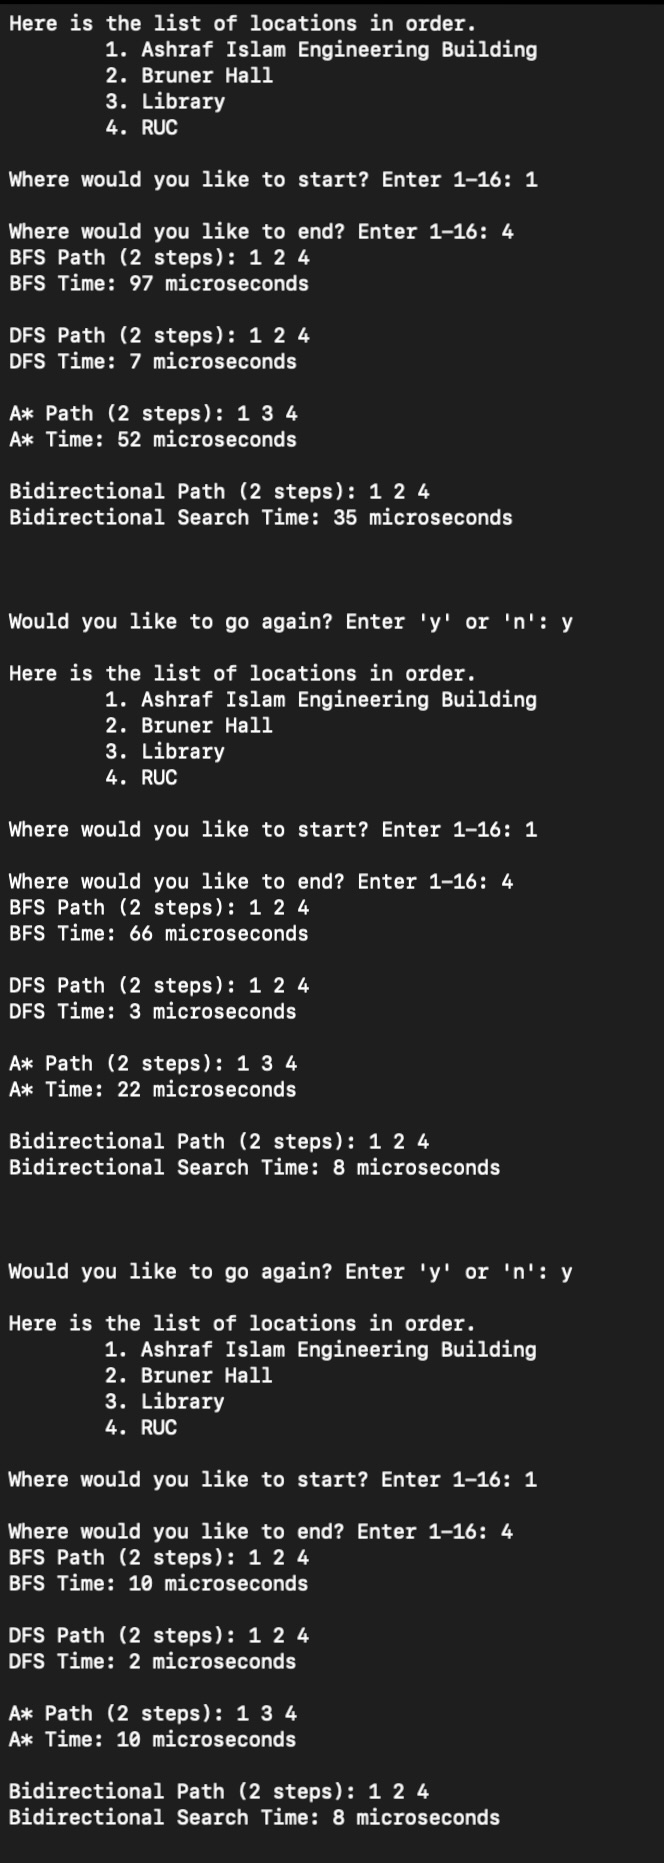

# Second Iteration
Medium Graph (8x8)
Ashraf-Islam Engineering Building, Bruner Hall, Library, Roaden University Center, Parking Lot, Prescott Hall, Laboratory Science Commons, Stonecipher Lecture Hall

In [9]:
MEDIUM_GRAPH = [

    [0,	1,	1,	0,	1,	1,	1,	0],
    [1,	0,	1,	1,	1,	1,	0,	0],
    [1,	1,	0,	1,	1,	1,	0,	0],
    [0,	1,	1,	0,	0,	0,	0,	0],
    [1,	1,	1,	0,	0,	1,	0,	0],
    [1,	1,	1,	0,	1,	0,	1,	0],
    [1,	0,	0,	0,	0,	1,	0,	1],
    [0,	0,	0,	0,	0,	0,	1,	0]
]

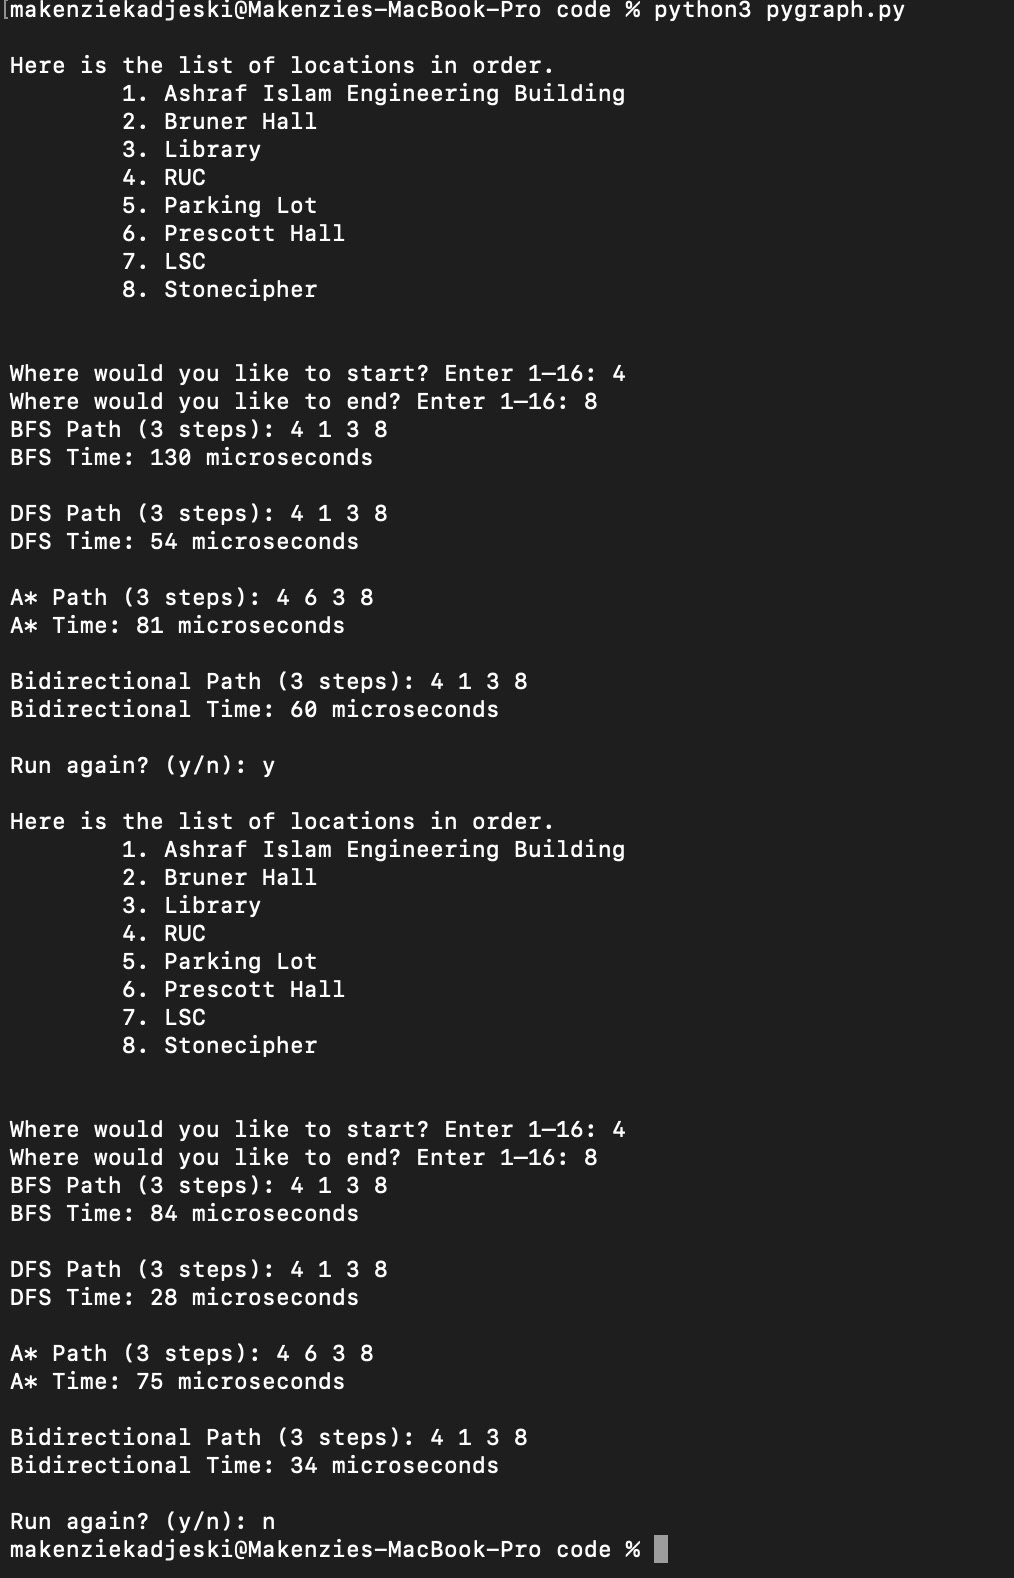

# Third Iteration
Large Graph (16x16)
Ashraf-Islam Engineering Building, Bruner Hall, Library, Roaden University Center, Parking Lot, Prescott Hall, Laboratory Science Commons, Stonecipher Lecture Hall, Brown Hall, Clement Hall, Bryan Fine Arts Building, Memorial Gym, Bell Hall, Derryberry Hall, Marc L. Burnett Fitness Center, Ray Morris Hall

In [10]:
LARGE_GRAPH = [

    [0,	1,	1,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [1,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0],
    [1,	1,	0,	1,	1,	1,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0],
    [0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	1,	0,	0],
    [1,	1,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0],
    [1,	1,	1,	0,	1,	0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0],
    [1,	0,	0,	0,	0,	1,	0,	1,	1,	1,	0,	1,	0,	1,	1,	1],
    [0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	1,	1,	1,	1,	1],
    [0,	1,	0,	0,	0,	1,	1,	1,	0,	1,	0,	1,	0,	1,  0,	0],
    [0,	1,	1,	1,	0,	1,	1,	1,	1,	0,	1,	1,	0,	1,	0,	0],
    [0,	0,	1,	1,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0],
    [0,	0,	0,	1,	0,	0,	1,	1,	1,	1,	1,	0,	1,	1,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	0,	1],
    [0,	0,	1,	1,	0,	0,	1,	1,	1,	1,	0,	1,	1,	0,	0,	0],
    [1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1],
    [1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	1,	0]
]

Example Output

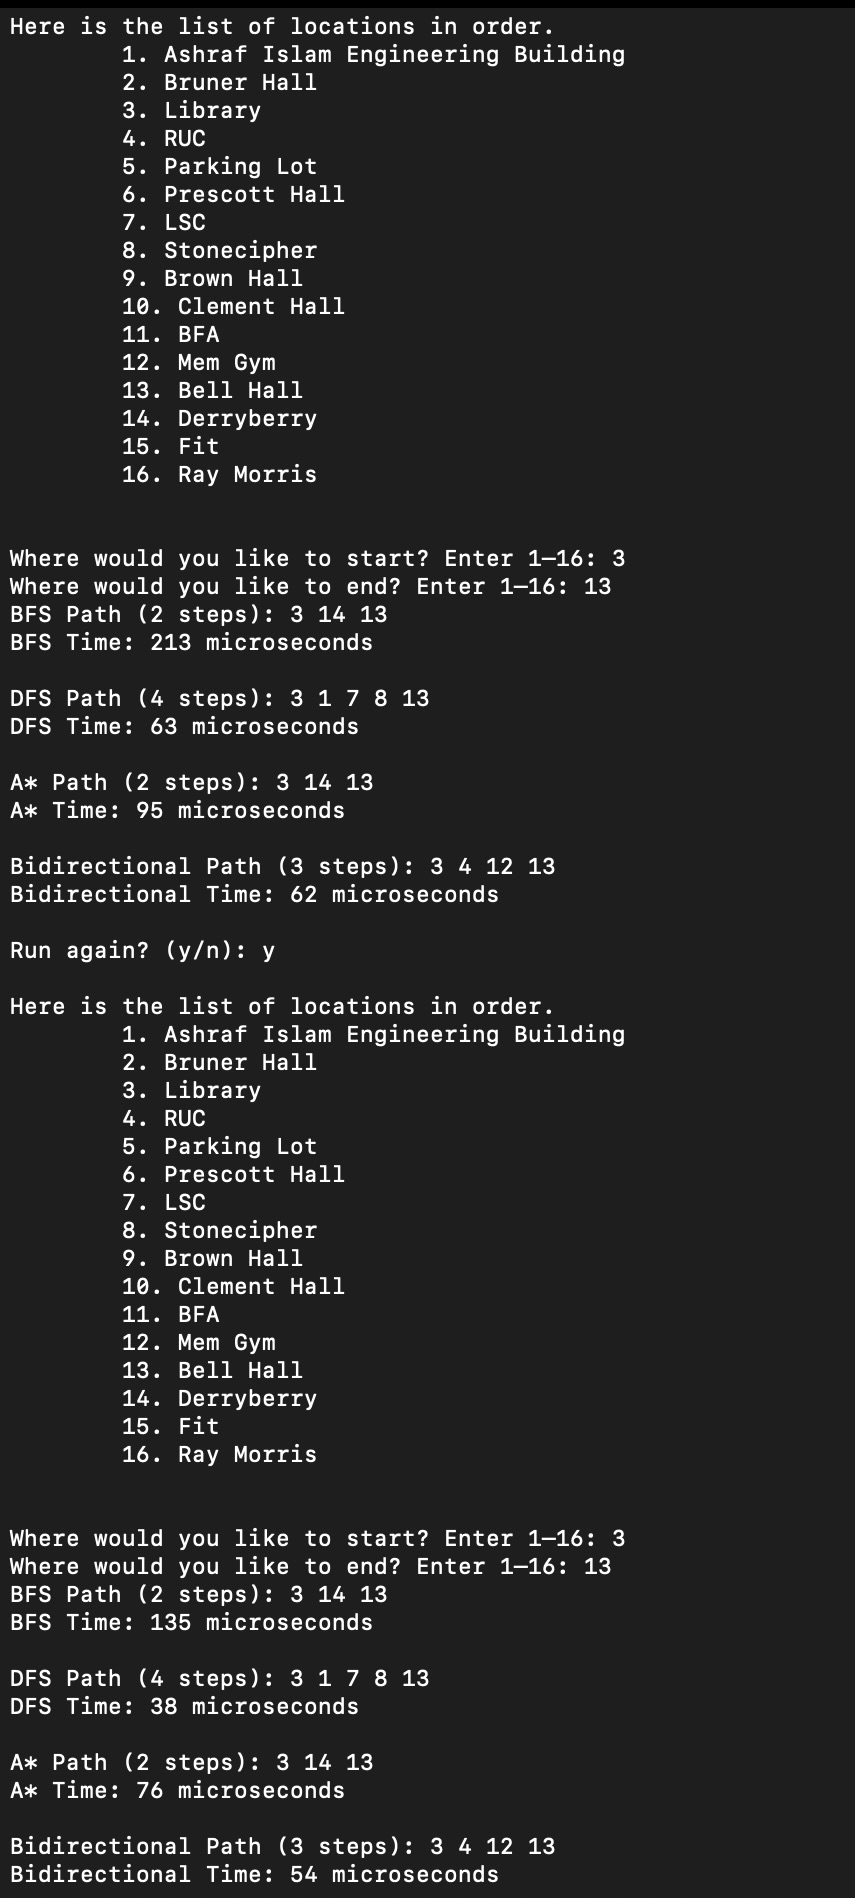

# **Conclusion**
BFS had the longest execution time by far which indicates that going through the graph level by level takes more work than the other methods. Then, A* had the next longest time followed closely by DFS. Normally, A* would be much slower than DFS but since our graph is unweighted, the heuristic for A* did not provide a strong advantage. Thus, A* explored nodes similarly to DFS which results in a similar execution time. And finally bidirectional search had the smallest time, making it our most efficient algorithm. Overall, the results remained consistent across runs and clearly highlight how bidirectional search can outperform the other approaches in unweighted graphs.

# Citations
-“Breadth First Search or BFS for a Graph.” GeeksforGeeks, 25 Oct. 2025, https://www.geeksforgeeks.org/dsa/breadth-first-search-or-bfs-for-a-graph/. <br>
-“Depth First Search or BFS for a Graph.” GeeksforGeeks, 25 Oct. 2025, https://www.geeksforgeeks.org/dsa/depth-first-search-or-dfs-for-a-graph/. <br>
-Kumar, Rajesh. “The A* Algorithm: A Complete Guide | Datacamp.” Data Camp, 7 Nov. 2024, https://www.datacamp.com/tutorial/a-star-algorithm.  <br>
-“Breadth First Search or BFS for a Graph.” GeeksforGeeks, 29 Mar. 2024, https://www.geeksforgeeks.org/dsa/bidirectional-search/. <br>